# Tumor Diagnosis

In this project, we aim to apply data analysis, dimensionality reduction, and clustering techniques to better understand the tumor characteristics and their classification.

### 01. Import libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
import time
import json

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

### 02. Import data

__Key Feature from Data frame head__
- $id$ _Column_: contain the unique ids,  therefore cannot be used for classification.

- $diagonsis$ _column_: With the _binary Values_ $\rightarrow$ Target column containing the class $labels$
  - $M$ - $Malignant$ $\rightarrow$ Tending to invade normal tissue 
  - $B$ - $Benign$ $\rightarrow$ not harmful in effect.

### __Ten real-valued features are computed for each cell nucleus:__

1. __radius__ (mean of distances from center to points on the perimeter) 
2. __texture__ (standard deviation of gray-scale values) 
3. __perimeter__ 
4. __area__ 
5. __smoothness__ (local variation in radius lengths) 
6. __compactness__ (perimeter^2 / area - 1.0) 
7. __concavity__ (severity of concave portions of the contour) 
8. __concave points__ (number of concave portions of the contour)
9. __symmetry__
10. __fractal dimension__ ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

__Class distribution:__ $357$ $\rightarrow$ $Benign$ - | - $212$ $\rightarrow$ $Malignant$

In [3]:
# Load the column names from the JSON file
with open('.\static\column_names.json', 'r') as json_file:
    saved_column_names = json.load(json_file)

# Read the .data file into a Pandas DataFrame
df = pd.read_csv('.\static\wdbc.data', header=None, names=saved_column_names)

# Display the first few rows of the DataFrame
df.head()

,id,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Beautifully formatted output for dataset details
print(f"Data Points (Rows)   : {df.shape[0]:,}")
print(f"Features (Columns)   : {df.shape[1]}")
print(f"Feature Names        : {', '.join(df.columns)}")

Data Points (Rows)   : 569
Features (Columns)   : 32
Feature Names        : id, diagnosis, radius1, texture1, perimeter1, area1, smoothness1, compactness1, concavity1, concave_points1, symmetry1, fractal_dimension1, radius2, texture2, perimeter2, area2, smoothness2, compactness2, concavity2, concave_points2, symmetry2, fractal_dimension2, radius3, texture3, perimeter3, area3, smoothness3, compactness3, concavity3, concave_points3, symmetry3, fractal_dimension3


### 03. Data preprocesing

In [5]:
# The 'id' column is an arbitrary identifier with no meaningful contribution 
# to pattern analysis, correlations, or clustering, and may introduce noise into the model.
df_cleaned = df.drop(columns=['id'])

In [6]:
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder to perform label encoding
label_encoder = LabelEncoder()

# Convert 'diagnosis' column from 'b' and 'm' to 0 and 1
df_cleaned['diagnosis'] = label_encoder.fit_transform(df_cleaned['diagnosis'])

In [7]:
# See preprocessing result
df_cleaned.head()

,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 04. Correlation Analysis and Feature Selection

You will need to look at the correlation between the features in your dataset to identify which ones are highly correlated, as highly correlated features can introduce multicollinearity, affecting the model's performance.

In [8]:
# Create correlation matrix
corr_matrix = df_cleaned.corr()

In [ ]:
# Create Pairplot from Seaborn to see relationship between individual features and diagnosis
# 'Benign (0)', 'Malignant (1)'
sns.pairplot(df_cleaned, palette='coolwarm', hue='diagnosis')

# Adjust legend position to the upper left corner
plt.legend(title='Diagnosis', loc='upper left', labels=['Benign (0)', 'Malignant (1)'], fontsize=12)

# Show the plot
plt.show()

In [ ]:
# # Distribution of Features
# fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
# for i in range(len(numerical_features)):
#     plt.subplot(3,3,i+1)
#     sns.distplot(data[numerical_features[i]],color = colors[0])
#     title = 'Distribution : ' + numerical_features[i]
#     plt.title(title)
# plt.show()

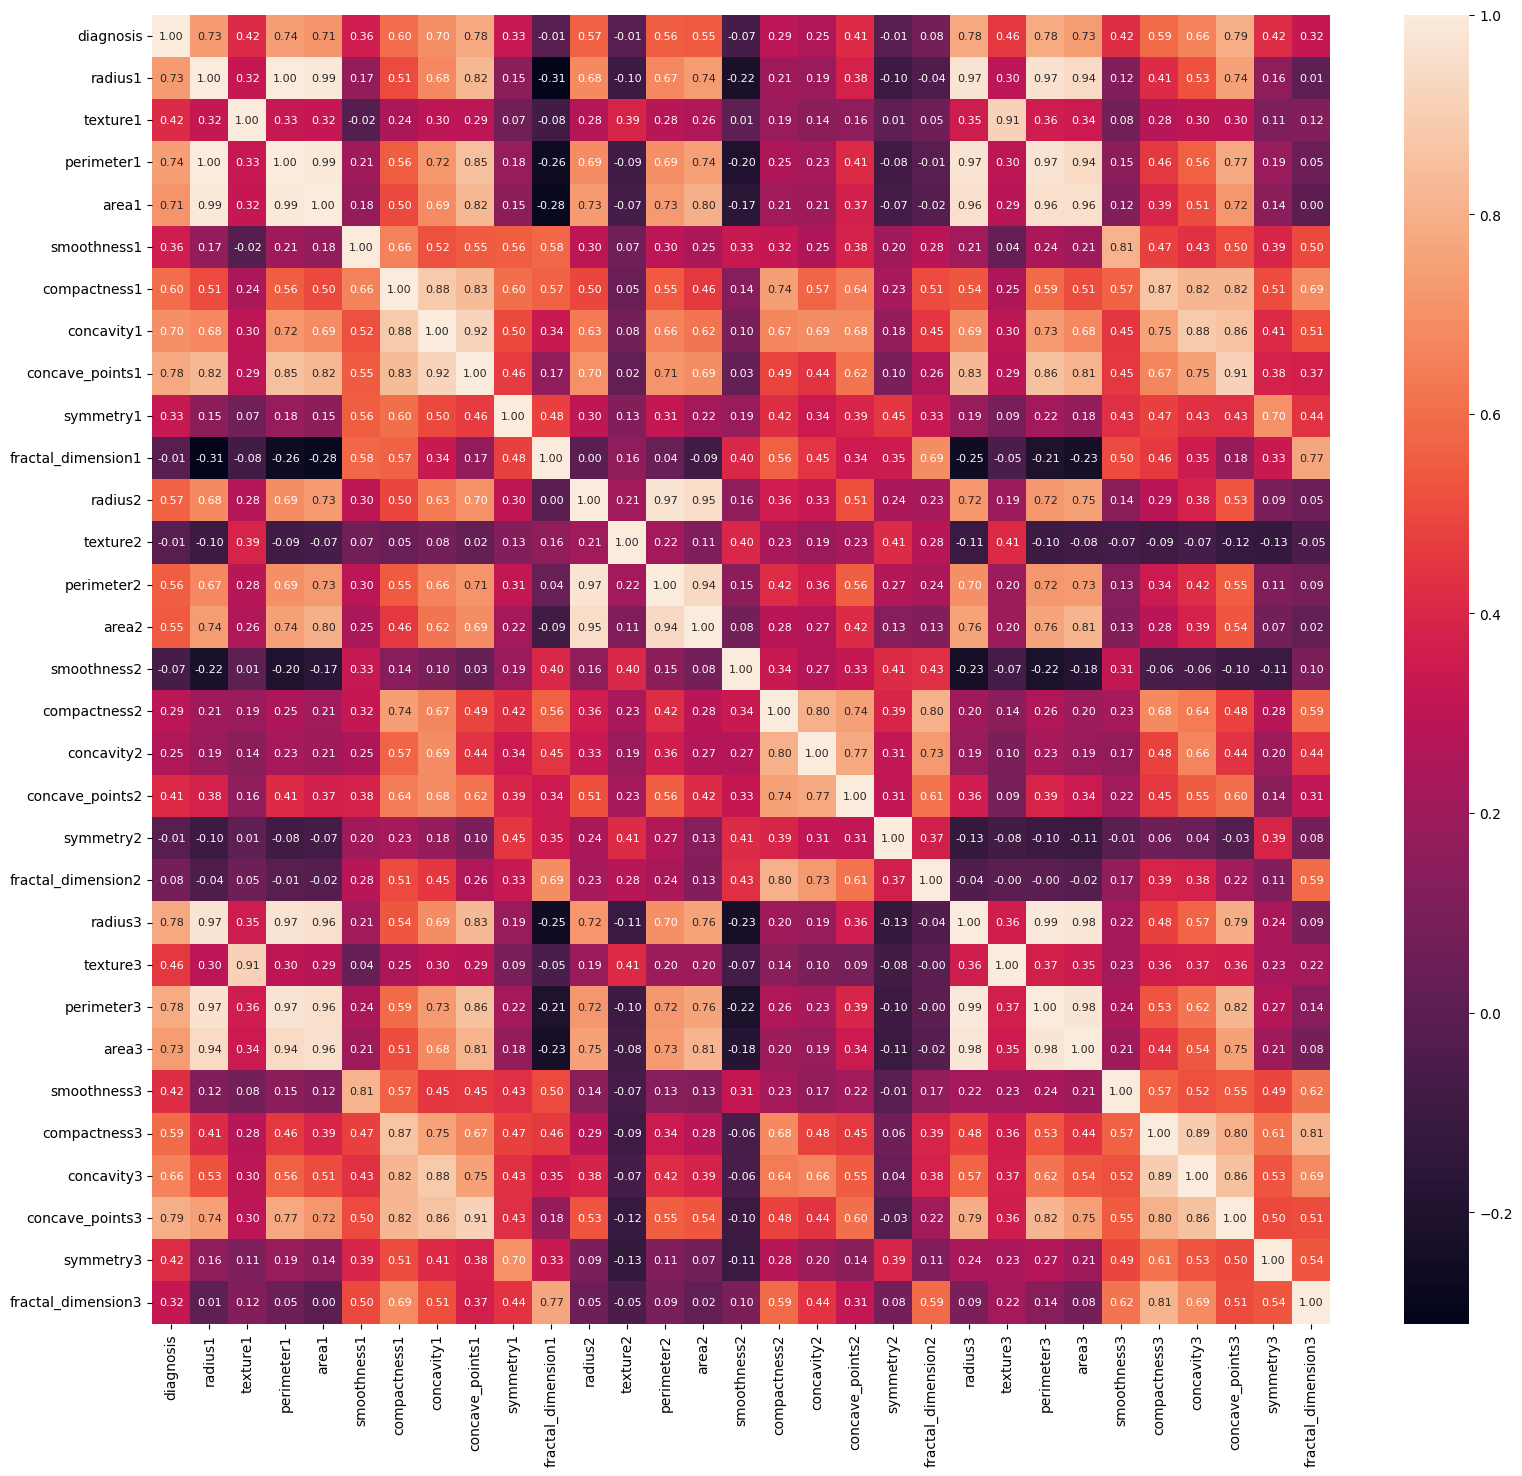

In [9]:
# Plot the correlation matrix
plt.figure(figsize=(19, 17))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, annot_kws={"size": 8}, fmt=".2f")
plt.show()

In [10]:
# Mask the diagonal (set to NaN) to avoid self-correlation
np.fill_diagonal(corr_matrix.values, np.nan)

# Stack the correlation matrix and sort the values
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Show the pairs with the highest correlation, excluding the diagonal
print(corr_pairs.head(10))

radius1     perimeter1    0.997855
perimeter1  radius1       0.997855
radius3     perimeter3    0.993708
perimeter3  radius3       0.993708
radius1     area1         0.987357
area1       radius1       0.987357
perimeter1  area1         0.986507
area1       perimeter1    0.986507
radius3     area3         0.984015
area3       radius3       0.984015
dtype: float64


### 04. Feature Engineering (PCA & Other Methods)

PCA: PCA is useful when you have many features and want to reduce them to a smaller set of uncorrelated features (principal components) while preserving as much variance as possible.

Normalization/Standardization: It's essential to scale your data before PCA or clustering, especially when features have different units or ranges.
Domain-Specific Transformations: You can combine features, create new ones based on domain knowledge, or apply feature extraction methods.


To perform PCA (Principal Component Analysis) and identify the 20 most important features, you can follow these steps:

Standardize the data: PCA is sensitive to the scale of the data, so it is important to standardize it before applying PCA.
Apply PCA: Fit the PCA model to your data and retrieve the components.
Examine the importance of each feature: The components are linear combinations of the original features, and the importance of each feature can be determined by the absolute value of the component loadings.

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizes the features so that they have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

In [12]:
# Apply PCA and keep all components
pca = PCA()
pca.fit(df_scaled)

# Get the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Get the components (principal axes in feature space)
components = pca.components_

In [13]:
# Sum the absolute values of the components for each feature
feature_importance = np.abs(components).sum(axis=0)

# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': df_cleaned.columns,
    'Importance': feature_importance
})

# Sort the features by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate the cumulative sum of the Importance values (each row includes the current and all previous feature importances)
feature_importance_df['Total Importance'] = feature_importance_df['Importance'].cumsum()

# Get the top 20 most important features
top_20_features = feature_importance_df.head(20)

# Print the top 20 features
top_20_features

,Feature,Importance,Total Importance
20,fractal_dimension2,4.524170,4.524170
27,concavity3,4.475811,8.999981
24,area3,4.424537,13.424518
14,area2,4.369746,17.794264
16,compactness2,4.294737,22.089001
6,compactness1,4.287754,26.376755
17,concavity2,4.285388,30.662143
26,compactness3,4.208389,34.870532
11,radius2,4.201749,39.072281
10,fractal_dimension1,4.132010,43.204291


In [78]:
# # Assume 'top_20_features' is the DataFrame that contains the features sorted by importance
# # Choose a threshold to select features (e.g., keep the top 20, or features above a certain importance)

# # Option 1: Keep the top 20 features
# top_features = top_20_features['Feature'].values
# df_reduced = df[top_features]

# # Option 2: Keep features above a certain importance threshold
# threshold = 0.1  # Set a threshold for feature importance
# important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].values
# df_reduced = df[important_features]

# # Show the reduced DataFrame with important features
# df_reduced.head()

### 05. Determine the Number of Components to Retain

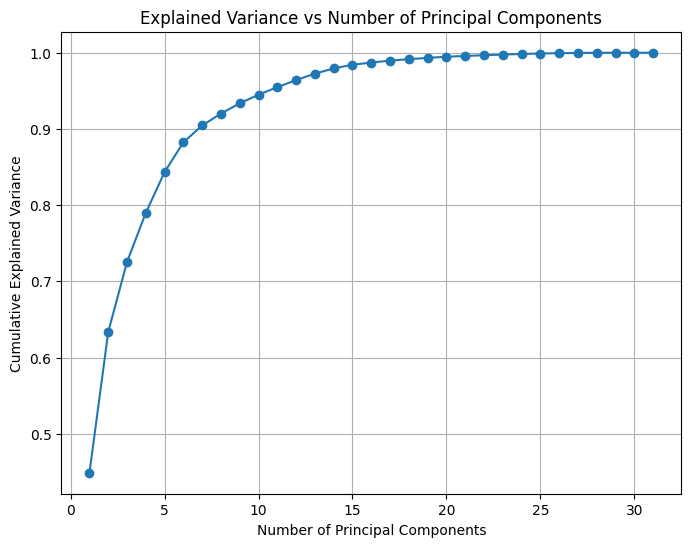

In [16]:
# Get the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance to determine how many components to keep
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

In [37]:
# Choose the number of components that explain at least 95% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to retain: {n_components}")

Number of components to retain: 11


In [38]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

### 06. Perform Clustering on the PCA-reduced Data

- The Elbow Method evaluates the trade-off between cluster compactness (inertia) and the number of clusters. A higher _𝑘_ might better describe the structure but risks overfitting.
- The Silhouette Method evaluates how well-defined and distinct clusters are. A smaller _𝑘_ is generally more reliable in this method.

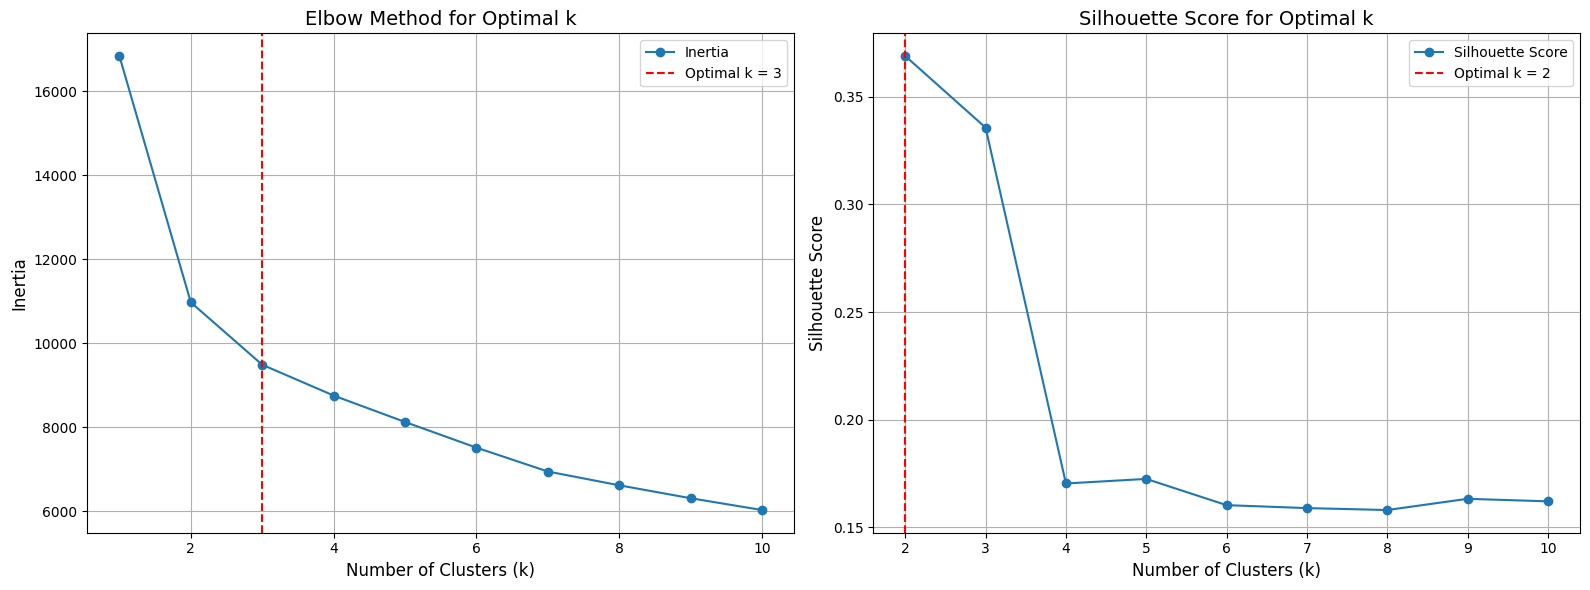

The optimal k (Elbow Method) is: 3
The optimal k (Silhouette Method) is: 2


In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

# Define the range of k values
k_values_elbow = range(1, 11)
k_values_silhouette = range(2, 11)  # Silhouette requires at least 2 clusters

# Elbow Method: Calculate inertia
inertia = []
for k in k_values_elbow:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Automatically detect the elbow point
knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k_elbow = knee_locator.knee

# Silhouette Method: Calculate silhouette scores
silhouette_scores = []
for k in k_values_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the k with the maximum silhouette score
optimal_k_silhouette = k_values_silhouette[silhouette_scores.index(max(silhouette_scores))]

# Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Elbow Method Plot
axes[0].plot(k_values_elbow, inertia, marker='o', label='Inertia')
axes[0].axvline(x=optimal_k_elbow, color='r', linestyle='--', label=f'Optimal k = {optimal_k_elbow}')
axes[0].set_title('Elbow Method for Optimal k', fontsize=14)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].legend()
axes[0].grid()

# Silhouette Score Plot
axes[1].plot(k_values_silhouette, silhouette_scores, marker='o', label='Silhouette Score')
axes[1].axvline(x=optimal_k_silhouette, color='r', linestyle='--', label=f'Optimal k = {optimal_k_silhouette}')
axes[1].set_title('Silhouette Score for Optimal k', fontsize=14)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

print(f"The optimal k (Elbow Method) is: {optimal_k_elbow}")
print(f"The optimal k (Silhouette Method) is: {optimal_k_silhouette}")

### 07. Clustering

Para observar las caracteristicas de cada uno de los clusters
Adicional se busca comparar como se comportan los diagnosticos y si el modelo fue capaz de tomerlo de forma automatica

In [64]:
# Fit the final model
final_kmeans = KMeans(n_clusters=2, random_state=42)
final_labels = final_kmeans.fit_predict(df_pca)

In [65]:
df_cleaned['Cluster'] = final_labels

In [66]:
df_cleaned.head()

,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Cluster
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


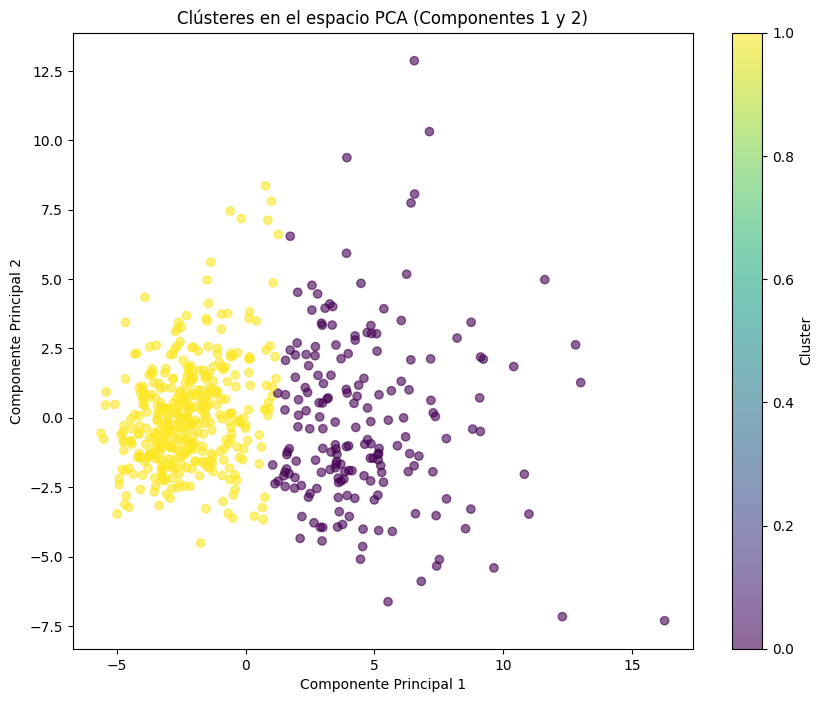

In [67]:
# Crear el gráfico de dispersión usando las primeras dos componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clústeres en el espacio PCA (Componentes 1 y 2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

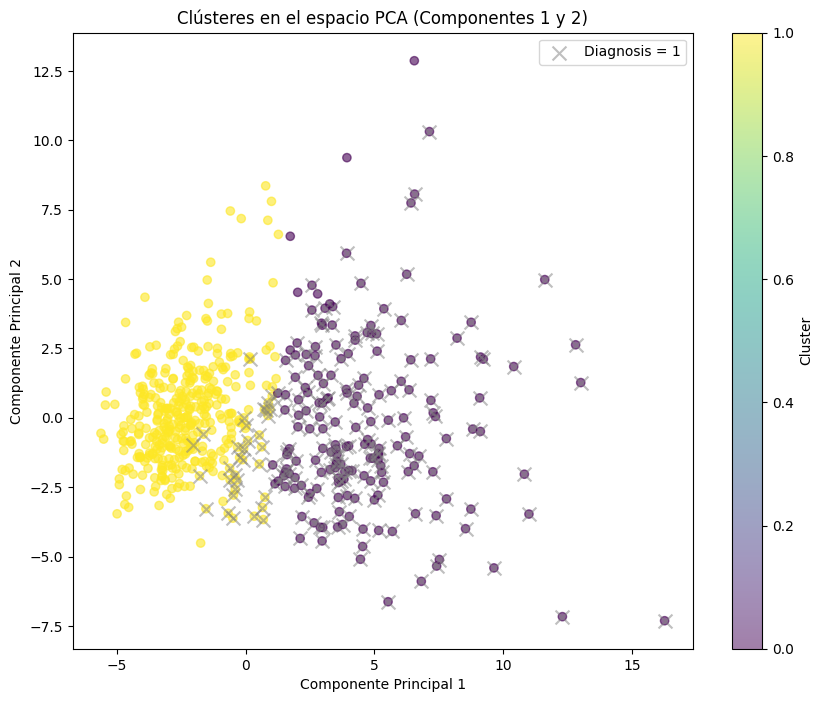

In [72]:
# Crear el gráfico de dispersión usando las primeras dos componentes principales
plt.figure(figsize=(10, 8))

# Graficar todos los puntos con la coloración por clúster
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned['Cluster'], cmap='viridis', alpha=0.6)

# Graficar los puntos donde diagnosis == 1 con una 'x' encima
diagnosis_1 = df_cleaned[df_cleaned['diagnosis'] == 1]
plt.scatter(df_pca[diagnosis_1.index, 0], df_pca[diagnosis_1.index, 1], color='grey', marker='x', s=100, alpha=0.5, label='Diagnosis = 1')

# Añadir detalles al gráfico
plt.title('Clústeres en el espacio PCA (Componentes 1 y 2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.legend()

plt.show()

Si quieres una visualización más detallada y con mejor separación de los clústeres, puedes usar t-SNE, que es una técnica no lineal para la reducción de dimensionalidad, especialmente útil cuando los clústeres no son lineales en el espacio original.

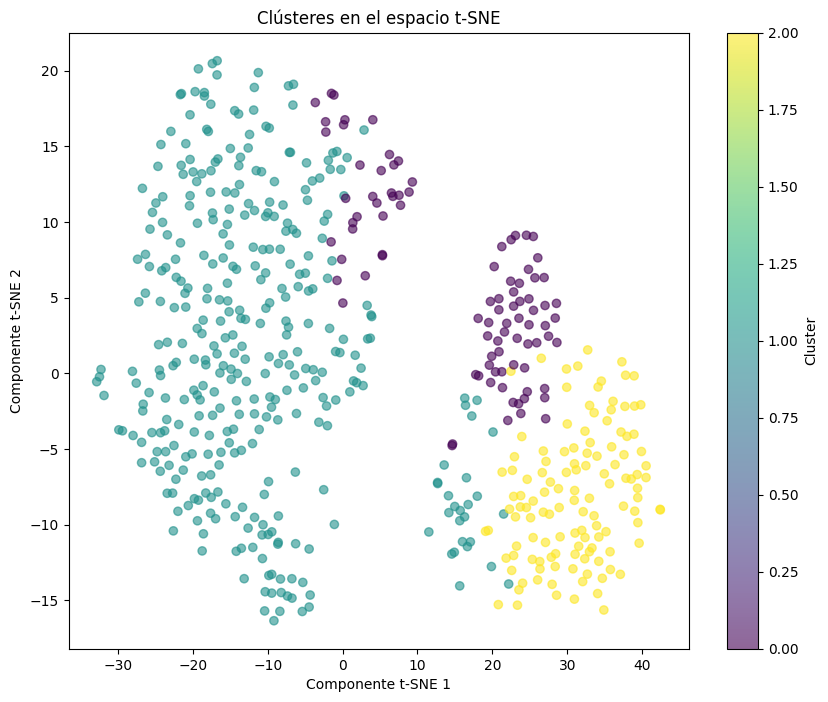

In [50]:
from sklearn.manifold import TSNE

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Graficar los clústeres en el espacio 2D de t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_cleaned['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clústeres en el espacio t-SNE')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

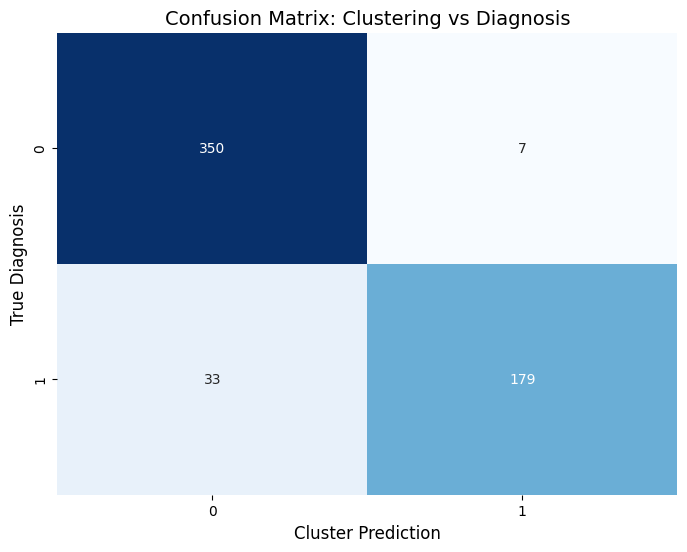

Clustering Accuracy: 92.97%


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Assign clusters to 'diagnosis' categories based on the majority
# Create a table showing the distribution of 'diagnosis' values in each cluster
cluster_diagnosis_map = df_cleaned.groupby('Cluster')['diagnosis'].agg(lambda x: x.mode()[0]).to_dict()

# Map the 'diagnosis' labels to the clusters
df_cleaned['Predicted_diagnosis'] = df_cleaned['Cluster'].map(cluster_diagnosis_map)

# Step 2: Create the confusion matrix
y_true = df_cleaned['diagnosis']
y_pred = df_cleaned['Predicted_diagnosis']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 3: Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Presenting results: Confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true), cbar=False)
plt.title('Confusion Matrix: Clustering vs Diagnosis', fontsize=14)
plt.xlabel('Cluster Prediction', fontsize=12)
plt.ylabel('True Diagnosis', fontsize=12)
plt.show()

# Presenting accuracy
print(f"Clustering Accuracy: {accuracy*100:.2f}%")

### 007. Conclusion

- 92.97% accuracy means that the clustering model correctly predicted the diagnosis label for approximately 93% of the samples in your dataset. This is a high level of agreement between the clustering results and the actual diagnoses.

- Cluster 0: Mostly consists of samples with a diagnosis of 1 (malignant or positive case).

- Cluster 1: Mostly consists of samples with a diagnosis of 0 (benign or negative case), with a small number of malignant samples.

En resumen, los falsos positivos y falsos negativos son cruciales en el diagnóstico del cáncer, ya que tienen implicaciones directas en la salud y el tratamiento de los pacientes. El manejo de estos casos debe implicar una revisión exhaustiva, pruebas adicionales y monitoreo continuo, así como el ajuste y la mejora de los modelos de clustering para minimizar estos errores. La colaboración con médicos especialistas y la incorporación de tecnologías avanzadas de diagnóstico son clave para mejorar la precisión y reducir los riesgos asociados con los errores en el diagnóstico.


El hecho de que un modelo no supervisado, como el clustering, logre un rendimiento interesante en un contexto supervisado, sugiere que puede identificar patrones subyacentes relevantes en los datos. Esto podría revelar subgrupos desconocidos o mejorar la segmentación en modelos supervisados. Sin embargo, es crucial validar estos resultados con expertos del dominio, ya que los clústeres podrían no ser clínicamente significativos sin un análisis adicional. El clustering puede complementar otros enfoques supervisados, ayudando a mejorar la precisión del diagnóstico y a explorar nuevas categorías dentro de los datos.

### End